<h1>
<center>Navid Bahadoran</center>
</h1>
<h1>
<center>Homework 1, due September 13th, 11:59pm</center>
</h1>

<h2>
<center>September 7, 2023</center>
</h2>
Use a programming language or package where decision trees and random forests
can be trained and applied. Examples include Matlab, Python (scikit-learn package),
or R.

1.Using the training and test sets specified in the syllabus, perform the following tasks:

a) On the madelon dataset, train decision trees of maximum depth 1, 2, .... up to 12, for a total of 12 decision trees. If your package does not allow the max depth as a parameter, train trees with $2^1, 2^2, ..., 2^{12} $ nodes, again a total of 12 trees. Use the trained trees to predict the class labels on the training and test sets, and obtain the training and test misclassification errors. Plot on the same graph the training and test misclassification errors vs tree depth (or $log2$ of nodes) as two separate curves. Report in a table the minimum test error and the tree depth (number of nodes or splits) for which the minimum was attained. (2 points)

In [1]:
import pandas as pd, numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from IPython.display import HTML

In [2]:
madelon_test = Path('D:\Pycharm\Courses\STA5635\HW1\Data\MADELON\madelon_test.data')
madelon_train = Path('D:\Pycharm\Courses\STA5635\HW1\Data\MADELON\madelon_train.data')
madelon_train_labels = Path('D:\Pycharm\Courses\STA5635\HW1\Data\MADELON\madelon_train.labels')
madelon_valid = Path('D:\Pycharm\Courses\STA5635\HW1\Data\MADELON\madelon_valid.data')
madelon_valid_labels = Path('D:\Pycharm\Courses\STA5635\HW1\Data\MADELON\madelon_valid.labels')

In [29]:
madelon_test_df = pd.read_csv(madelon_test, delimiter=' ', header=None).drop(500,axis=1)
madelon_train_df = pd.read_csv(madelon_train, delimiter=' ', header=None).drop(500,axis=1)
madelon_train_labels_df = pd.read_csv(madelon_train_labels, delimiter=' ', header=None)
madelon_valid_df = pd.read_csv(madelon_valid, delimiter=' ', header=None).drop(500,axis=1)
madelon_valid_labels_df = pd.read_csv(madelon_valid_labels, delimiter=' ', header=None)

In [30]:
madelon_train_df.shape

(2000, 500)

In [6]:
max_depth_range=list(range(1,13))
madelon_training_error_list=[]
madelon_test_error_list=[]
for maximum_depth in max_depth_range:
    dt_clf=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=maximum_depth)
    dt_clf.fit(madelon_train_df,madelon_train_labels_df)
    madelon_training_error_list.append(1-dt_clf.score(madelon_train_df,madelon_train_labels_df))
    madelon_test_error_list.append(1-dt_clf.score(madelon_valid_df,madelon_valid_labels_df))    

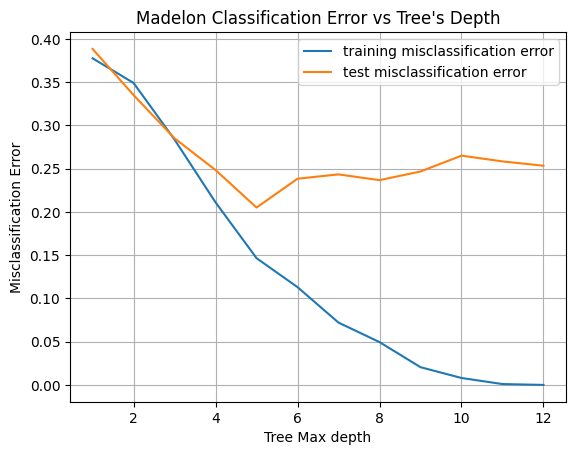

In [7]:
plt.plot(max_depth_range,madelon_training_error_list,label="training misclassification error")
plt.plot(max_depth_range,madelon_test_error_list,label="test misclassification error")
plt.grid(True)
plt.title("Madelon Classification Error vs Tree's Depth")
plt.legend(loc="upper right")
plt.xlabel('Tree Max depth')
plt.ylabel('Misclassification Error');

In [8]:
d={'Tree Max Depth':max_depth_range,'training Misclassification error':madelon_training_error_list,
    'testing Misclassification error':madelon_test_error_list}
HTML(pd.DataFrame(d).to_html(index=False))

Tree Max Depth,training Misclassification error,testing Misclassification error
1,0.3775,0.388333
2,0.3490,0.335000
3,0.2835,0.285000
4,0.2110,0.248333
5,0.1465,0.205000
6,0.1130,0.238333
7,0.0720,0.243333
8,0.0495,0.236667
9,0.0205,0.246667
10,0.0080,0.265000


As we can see for the test, the minimum error has been attained when the tree depth is `5` and the error `0.2066`.
This is the example of overfitting, which shows that in the training by growing tree we get better accuracy, but in the testing our error is increasing.

b) Repeat point a) on the satimage dataset.

In [12]:
sat_train = Path('D:\Pycharm\Courses\STA5635\HW1\Data\satimage\X.dat')
sat_train_labels = Path('D:\Pycharm\Courses\STA5635\HW1\Data\satimage\Y.dat')
sat_test = Path('D:\Pycharm\Courses\STA5635\HW1\Data\satimage\Xtest.dat')
sat_test_labels = Path('D:\Pycharm\Courses\STA5635\HW1\Data\satimage\Ytest.dat')

In [13]:
sat_train_df = pd.read_csv(sat_train, delimiter=' ', header=None)
sat_train_labels_df = pd.read_csv(sat_train_labels, delimiter=' ', header=None)
sat_test_df = pd.read_csv(sat_test, delimiter=' ', header=None)
sat_test_labels_df = pd.read_csv(sat_test_labels, delimiter=' ', header=None)

In [14]:
sat_training_error_list=[]
sat_test_error_list=[]
for maximum_depth in max_depth_range:
    dt_clf=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=maximum_depth)
    dt_clf.fit(sat_train_df,sat_train_labels_df)
    sat_training_error_list.append(1-dt_clf.score(sat_train_df,sat_train_labels_df))
    sat_test_error_list.append(1-dt_clf.score(sat_test_df,sat_test_labels_df))    

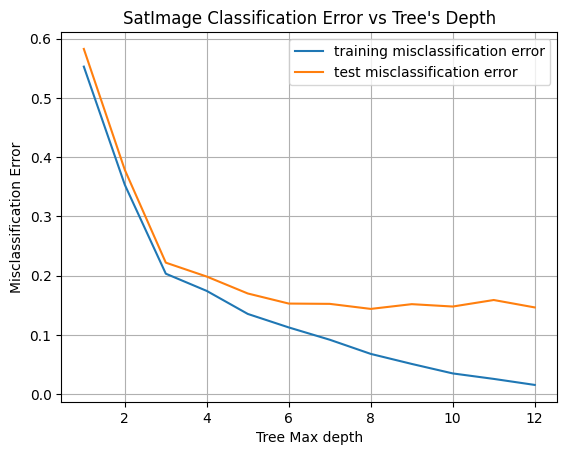

In [15]:
plt.plot(max_depth_range,sat_training_error_list,label="training misclassification error")
plt.plot(max_depth_range,sat_test_error_list,label="test misclassification error")
plt.grid(True)
plt.title("SatImage Classification Error vs Tree's Depth")
plt.legend(loc="upper right")
plt.xlabel('Tree Max depth')
plt.ylabel('Misclassification Error');

In [16]:
d={'Tree Max Depth':max_depth_range,'training Misclassification error':sat_training_error_list,
    'testing Misclassification error':sat_test_error_list}
HTML(pd.DataFrame(d).to_html(index=False))

Tree Max Depth,training Misclassification error,testing Misclassification error
1,0.552649,0.5825
2,0.353326,0.3785
3,0.203382,0.2220
4,0.174295,0.1985
5,0.135513,0.1700
6,0.112740,0.1530
7,0.091995,0.1525
8,0.068095,0.1440
9,0.051184,0.1520
10,0.035175,0.1480


As we can see for the test, the minimum error has been attained when the tree depth is `8` and the error `0.1440`.This is the example of overfitting, which shows that in the training by growing tree we get better accuracy, but in the testing our error is increasing.

c) On the madelon dataset, for each of $k\in{3, 10, 30, 100, 300}$  train a random
forest with k trees where the split attribute at each node is chosen from a random
subset of ~$\sqrt500$ features. Use the trained trees to predict the class labels on
the training and test sets, and obtain the training and test misclassification errors.
Plot on the same graph the training and test errors vs number of trees k as two
separate curves. Report the training and test misclassification errors in a table.
(3 points)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
number_trees = [3, 10, 30, 100, 300] #Number of trees

sqrt_error_training_list = []
sqrt_error_validation_list = []

for num in number_trees:
    RF_Tress = RandomForestClassifier(random_state=0, n_estimators = num, max_features = "sqrt",criterion="entropy",n_jobs=-1)
    RF_Tress.fit(madelon_train_df, madelon_train_labels_df.values.ravel())
    sqrt_error_training_list.append(1-RF_Tress.score(madelon_train_df,madelon_train_labels_df))
    sqrt_error_validation_list.append(1-RF_Tress.score(madelon_valid_df,madelon_valid_labels_df))

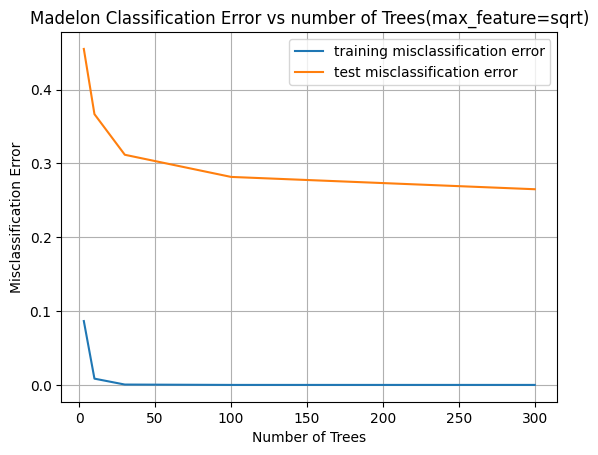

In [30]:
plt.plot(number_trees,sqrt_error_training_list,label="training misclassification error")
plt.plot(number_trees,sqrt_error_validation_list,label="test misclassification error")
plt.grid(True)
plt.legend()
plt.title("Madelon Classification Error vs number of Trees(max_feature=sqrt)")
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Error');

In [19]:
d={'Number of trees':number_trees,'training Misclassification error':sqrt_error_training_list,
    'testing Misclassification error':sqrt_error_validation_list}
HTML(pd.DataFrame(d).to_html(index=False))

Number of trees,training Misclassification error,testing Misclassification error
3,0.0865,0.455000
10,0.0085,0.366667
30,0.0005,0.311667
100,0.0000,0.281667
300,0.0000,0.265000


d) Repeat point c) on the madelon dataset where the split attribute at each node is
chosen from a random subset of $∼ln(500)$ features. (1 point)

In [21]:
log_error_training_list = []
log_error_validation_list = []

for num in number_trees:
    RF_Tress = RandomForestClassifier(random_state=0, n_estimators = num, max_features = int(np.log(500)),criterion="entropy",n_jobs=-1)
    RF_Tress.fit(madelon_train_df, madelon_train_labels_df.values.ravel())
    log_error_training_list.append(1-RF_Tress.score(madelon_train_df,madelon_train_labels_df))
    log_error_validation_list.append(1-RF_Tress.score(madelon_valid_df,madelon_valid_labels_df))

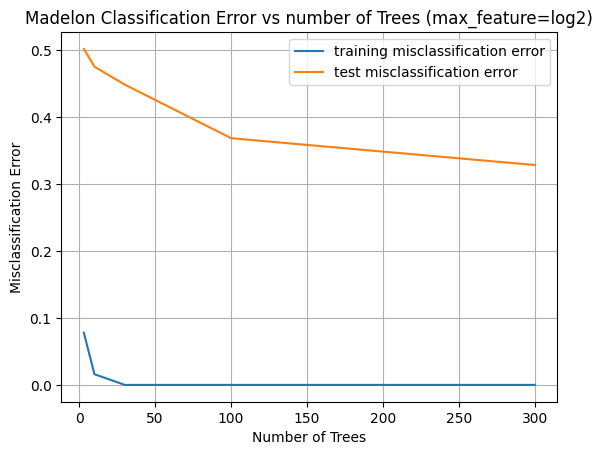

In [22]:
plt.plot(number_trees,log_error_training_list,label="training misclassification error")
plt.plot(number_trees,log_error_validation_list,label="test misclassification error")
plt.grid(True)
plt.legend()
plt.title("Madelon Classification Error vs number of Trees (max_feature=log2)")
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Error');

In [23]:
d={'Number of trees':number_trees,'training Misclassification error':log_error_training_list,
    'testing Misclassification error':log_error_validation_list}
HTML(pd.DataFrame(d).to_html(index=False))

Number of trees,training Misclassification error,testing Misclassification error
3,0.078,0.501667
10,0.016,0.475000
30,0.000,0.448333
100,0.000,0.368333
300,0.000,0.328333


e) Repeat point c) on the madelon dataset where the split attribute at each node is
chosen from all 500 features. (1 point)

In [24]:
all_error_training_list = []
all_error_validation_lsit = []

for num in number_trees:
    RF_Tress = RandomForestClassifier(random_state=0, n_estimators = num, max_features = None,criterion="entropy",n_jobs=-1)
    RF_Tress.fit(madelon_train_df, madelon_train_labels_df.values.ravel())
    all_error_training_list.append(1-RF_Tress.score(madelon_train_df,madelon_train_labels_df))
    all_error_validation_lsit.append(1- RF_Tress.score(madelon_valid_df,madelon_valid_labels_df))

In [ ]:
plt.plot(number_trees,all_error_training_list,label="training misclassification error")
plt.plot(number_trees,all_error_validation_lsit,label="test misclassification error")
plt.grid(True)
plt.legend(loc="upper right")
plt.title("Madelon Classification Error vs number of Trees (max_feature=n_features)")
plt.xlabel('Tree Max depth')
plt.ylabel('Misclassification Error');

In [21]:
d={'Number of trees':number_trees,'training Misclassification error':all_error_training_list,
    'testing Misclassification error':all_error_validation_lsit}
HTML(pd.DataFrame(d).to_html(index=False))

Number of trees,training Misclassification error,testing Misclassification error
3,0.0460,0.255000
10,0.0105,0.225000
30,0.0005,0.183333
100,0.0000,0.168333
300,0.0000,0.156667
